In [11]:
pip install --upgrade --force-reinstall --no-deps kaggle

Processing /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10/kaggle-1.5.10-cp37-none-any.whl
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


In [12]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"saisamarthtaluri","key":"09c0f9ec676ce0f63c6c8dc0b0747e39"}'}

In [13]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [14]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [15]:
! kaggle datasets download -d moltean/fruits

 99% 755M/760M [00:04<00:00, 233MB/s]
100% 760M/760M [00:04<00:00, 197MB/s]


In [ ]:
! unzip fruits.zip -d dataset

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [50]:
!mkdir Fruits1/Test

In [51]:
!mkdir Fruits1/Train

In [53]:
!mv "/content/dataset/fruits-360/Test/Avocado" "/content/Fruits1/Test"

In [54]:
!mv "/content/dataset/fruits-360/Test/Corn" "/content/Fruits1/Test"

In [55]:
!mv "/content/dataset/fruits-360/Test/Watermelon" "/content/Fruits1/Test"

In [56]:
!mv "/content/dataset/fruits-360/Training/Avocado" "/content/Fruits1/Train"

In [57]:
!mv "/content/dataset/fruits-360/Training/Corn" "/content/Fruits1/Train"

In [58]:
!mv "/content/dataset/fruits-360/Training/Watermelon" "/content/Fruits1/Train"

In [60]:
training_path = "/content/Fruits1/Test"
test_path = "/content/Fruits1/Train"

In [61]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    training_path,
    image_size = (100,100),
    batch_size = 32
)

Found 450 files belonging to 3 classes.


In [62]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size = (100,100),
    batch_size = 32
)

Found 1352 files belonging to 3 classes.


In [63]:
CNNmodel = tf.keras.models.Sequential()


CNNmodel.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
CNNmodel.add(tf.keras.layers.MaxPooling2D((2,2)))
CNNmodel.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
CNNmodel.add(tf.keras.layers.MaxPooling2D((2,2)))
CNNmodel.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu'))


CNNmodel.add(tf.keras.layers.Flatten())
CNNmodel.add(tf.keras.layers.Dense(32, activation='relu'))
CNNmodel.add(tf.keras.layers.Dense(64, activation='relu'))
CNNmodel.add(tf.keras.layers.Dense(3, activation='softmax'))

In [64]:
CNNmodel.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 21, 21, 64)        36928     
_________________________________________________________________
flatten_6 (Flatten)          (None, 28224)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)               

In [65]:
CNNmodel.compile(optimizer = 'adam',
                loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

In [66]:
history = CNNmodel.fit(train_dataset, validation_data=test_dataset, epochs = 10)

Epoch 1/10
43/43 [==============================] - 22s 503ms/step - loss: 11.5788 - accuracy: 0.7347 - val_loss: 0.0106 - val_accuracy: 0.9978
Epoch 2/10
43/43 [==============================] - 22s 500ms/step - loss: 5.9248e-05 - accuracy: 1.0000 - val_loss: 0.0145 - val_accuracy: 0.9956
Epoch 3/10
43/43 [==============================] - 22s 499ms/step - loss: 9.6705e-06 - accuracy: 1.0000 - val_loss: 0.0151 - val_accuracy: 0.9956
Epoch 4/10
43/43 [==============================] - 22s 499ms/step - loss: 4.2805e-06 - accuracy: 1.0000 - val_loss: 0.0148 - val_accuracy: 0.9956
Epoch 5/10
43/43 [==============================] - 21s 498ms/step - loss: 3.1676e-06 - accuracy: 1.0000 - val_loss: 0.0147 - val_accuracy: 0.9956
Epoch 6/10
43/43 [==============================] - 22s 499ms/step - loss: 2.9545e-06 - accuracy: 1.0000 - val_loss: 0.0151 - val_accuracy: 0.9956
Epoch 7/10
43/43 [==============================] - 22s 499ms/step - loss: 2.1776e-06 - accuracy: 1.0000 - val_loss: 0.01

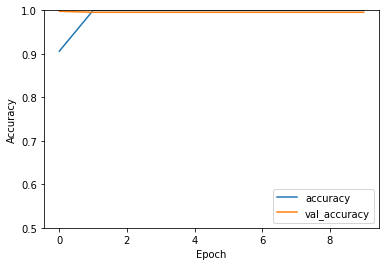

In [67]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')